# Activity: Exploring Data Visualizations and Pandas Profiling Using Jupyter Notebook

### Monfero, John Benedict
#### Week 5 - Introduction to Data Sciences

### Objective:
#### In this activity, you will analyze a CSV dataset using pandas for visualizations and pandas-profiling for a detailed data analysis report. Your task is to submit screenshots of your outputs at each step.

## Instructions:
#### Part 1: Working with Jupyter Notebook

#### Download and Load the CSV
Ensure the Titanic dataset or the CSV file provided by your instructor is saved on your local machine.

#### Open Jupyter Notebook on your PC.
In a new notebook, load the CSV into a pandas DataFrame:

`import pandas as pd # Load the dataset from the local file`

`df = pd.read_csv('your_dataset.csv') # Display the first few rows`

`df.head()`

#### Deliverable: Submit a screenshot of the first few rows of the dataset. file_name: LAST_NAME_1.png

In [1]:
import pandas as pd # Load the dataset from the local file

df = pd.read_csv('Crime_Data_from_2020_to_Present.csv') # Display the first few rows

df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [2]:
# Determine the column names of each series in the dataset

df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [3]:
# Determine whether each series have some missing entries or not at all:
df.isna().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           133099
Vict Age               0
Vict Sex          126595
Vict Descent      126605
Premis Cd             10
Premis Desc          567
Weapon Used Cd    619758
Weapon Desc       619758
Status                 0
Status Desc            0
Crm Cd 1              11
Crm Cd 2          875977
Crm Cd 3          941954
Crm Cd 4          944171
LOCATION               0
Cross Street      796643
LAT                    0
LON                    0
dtype: int64

In [4]:
df_clean = df.copy()

#Dropping columns with too much missing data as they may not provide insight into the data.
df_clean.drop(['Weapon Used Cd', 'Weapon Desc', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street', 'Premis Desc', 'Mocodes', 'DR_NO'], axis=1, inplace=True)
df_clean.head()

,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON
0,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,0,M,O,101.0,AA,Adult Arrest,510.0,1900 S LONGWOOD AV,34.0375,-118.3506
1,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,47,M,O,128.0,IC,Invest Cont,330.0,1000 S FLOWER ST,34.0444,-118.2628
2,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,19,X,X,502.0,IC,Invest Cont,480.0,1400 W 37TH ST,34.0210,-118.3002
3,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,405.0,IC,Invest Cont,343.0,14000 RIVERSIDE DR,34.1576,-118.4387
4,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,28,M,H,102.0,IC,Invest Cont,354.0,1900 TRANSIENT,34.0944,-118.3277


In [5]:
# Rename columns for better clarity and consistency
# Reason: Making column names more descriptive and standardized for easier understanding and analysis
df_clean.rename(columns={
    'Date Rptd': 'Date_Reported',          # Clarifies that this column represents the date the incident was reported
    'DATE OCC': 'Date_Occurred',           # Clarifies that this column represents the date the incident occurred
    'TIME OCC': 'Time_Occurred',           # Clarifies that this column represents the time the incident occurred
    'AREA': 'Area_Code',                   # Indicates that this column represents a code for different areas
    'AREA NAME': 'Area_Name',              # Consistently naming with underscores for readability
    'Rpt Dist No': 'Report_District_Number', # Expands abbreviations for clarity
    'Part 1-2': 'Part1_2_Indicator',       # Clarifies that this is an indicator for Part 1 or Part 2 crimes
    'Crm Cd': 'Crime_Code',                # Expands abbreviations for clarity
    'Crm Cd Desc': 'Crime_Description',    # Expands abbreviations for clarity
    'Vict Age': 'Victim_Age',              # Clarifies that this column represents the victim's age
    'Vict Sex': 'Victim_Sex',              # Clarifies that this column represents the victim's sex
    'Vict Descent': 'Victim_Descent',      # Clarifies that this column represents the victim's descent or ethnicity
    'Premis Cd': 'Premise_Code',           # Expands abbreviations for clarity
    'Status': 'Status_Code',               # Adds "Code" to make it clear this is a status indicator
    'Status Desc': 'Status_Description',   # Expands abbreviations for clarity
    'Crm Cd 1': 'Crime_Code_1',            # Expands abbreviations for clarity
    'LOCATION': 'Location',                # Consistently naming with only the first letter capitalized
    'LAT': 'Latitude',                     # Clarifies that this column represents the latitude coordinates
    'LON': 'Longitude'                     # Clarifies that this column represents the longitude coordinates
}, inplace=True)

In [6]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944235 entries, 0 to 944234
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date_Reported           944235 non-null  object 
 1   Date_Occurred           944235 non-null  object 
 2   Time_Occurred           944235 non-null  int64  
 3   Area_Code               944235 non-null  int64  
 4   Area_Name               944235 non-null  object 
 5   Report_District_Number  944235 non-null  int64  
 6   Part1_2_Indicator       944235 non-null  int64  
 7   Crime_Code              944235 non-null  int64  
 8   Crime_Description       944235 non-null  object 
 9   Victim_Age              944235 non-null  int64  
 10  Victim_Sex              817640 non-null  object 
 11  Victim_Descent          817630 non-null  object 
 12  Premise_Code            944225 non-null  float64
 13  Status_Code             944235 non-null  object 
 14  Status_Description  

### Part 2: Data Visualizations Using Matplotlib and Seaborn

#### Create a Histogram
Use matplotlib to create a histogram of 1 column to display the distribution of ages.

**Example:**

`import matplotlib.pyplot as plt`

`# Histogram for Age`

`df['Age'].hist(bins=20)`

`plt.title('Age Distribution')`

`plt.xlabel('Age')`

`plt.ylabel('Frequency')`

`plt.show()`

### Deliverable: Submit a screenshot of the histogram. file_name: LAST_NAME_2.png

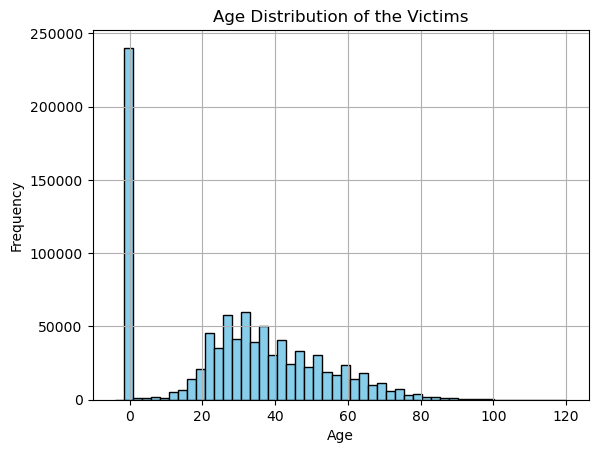

In [7]:
import matplotlib.pyplot as plt

# Histogram for Age

df_clean['Victim_Age'].hist(bins=50, color='skyblue', edgecolor='black')

plt.title('Age Distribution of the Victims')

plt.xlabel('Age')

plt.ylabel('Frequency')

plt.show()

### Create a Scatter Plot
Create a scatter plot to visualize the relationship between two columns.

**Example:**
```
# Scatter plot of Age vs Fare
df.plot.scatter(x='Age', y='Fare', alpha=0.5)
plt.title('Age vs Fare')
plt.show()
```

### Deliverable: Submit a screenshot of the scatter plot.  file_name: LAST_NAME_3.png

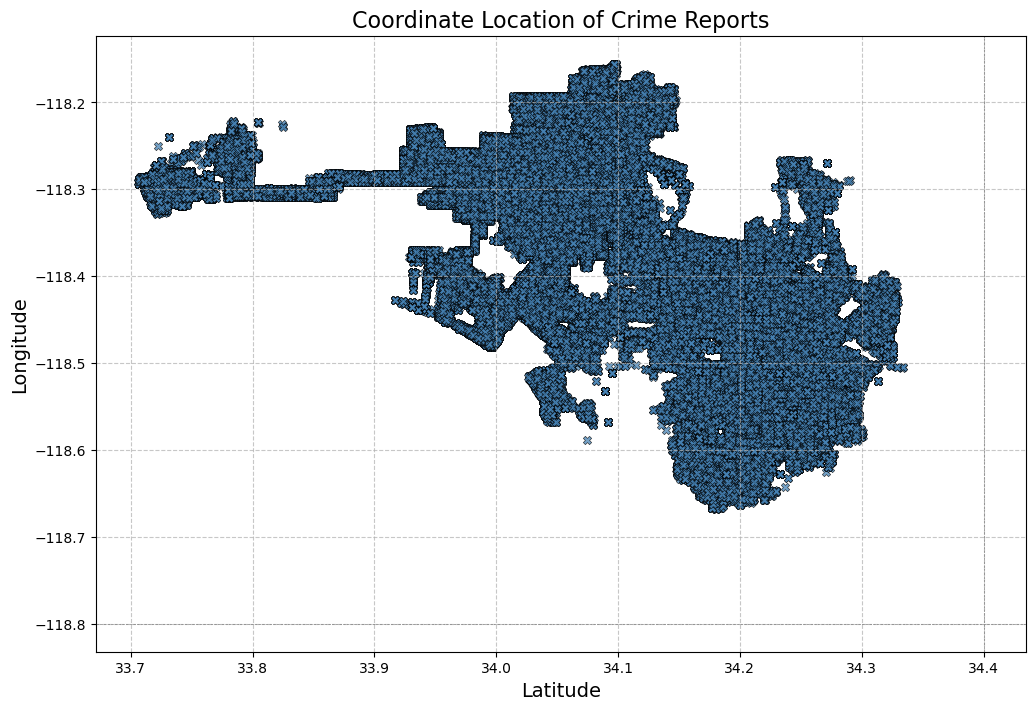

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_clean is already defined and cleaned

# Remove entries with Latitude = 0 and Longitude = 0
df_filtered = df_clean[(df_clean['Latitude'] != 0) | (df_clean['Longitude'] != 0)] # Outlier (0,0) crime case report's latitude and longtitude

# Create the scatter plot using Seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_filtered, x='Latitude', y='Longitude', color='steelblue', edgecolor='black', marker='X', alpha=0.75)

# Enhance the plot
plt.title('Coordinate Location of Crime Reports', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Longitude', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)  # Add a grid for better readability
plt.axhline(-118.8, color='grey', lw=0.5, linestyle='--')  # Add horizontal line at y= -119
plt.axvline(34.4, color='grey', lw=0.5, linestyle='--')  # Add vertical line at x= 34.4

# Show the plot
plt.show()


### Create a Boxplot
Generate a boxplot 1 column to identify outliers.

**Example:**
```
# Boxplot for Fare
df.boxplot(column='Fare')
plt.title('Boxplot of Fare') plt.show()
```

### Deliverable: Submit a screenshot of the boxplot. file_name: LAST_NAME_4.png

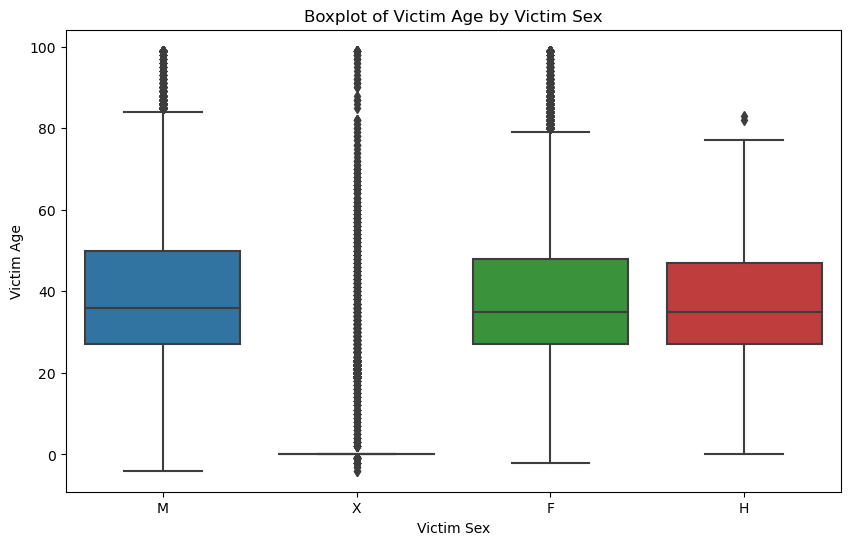

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Remove NaN and negative entries
df_cleaned = df_clean.dropna(subset=['Victim_Age', 'Victim_Sex'])  # Remove rows with NaN in specified columns
df_cleaned = df_clean[df_clean['Victim_Age'] >= 0]  # Keep only non-negative ages

# Filter to include only M, F, X, H categories
valid_sexes = ['M', 'F', 'X', 'H']
df_filtered = df_clean[df_clean['Victim_Sex'].isin(valid_sexes)]

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Victim_Sex', y='Victim_Age', data=df_filtered)
plt.title('Boxplot of Victim Age by Victim Sex')
plt.xlabel('Victim Sex')
plt.ylabel('Victim Age')
plt.show()

### Correlation Heatmap
Use seaborn to create a heatmap showing the correlation between numerical columns.

**Example:**
```
import seaborn as sns
# Correlation matrix
corr = df.corr()
# Heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
```
### Deliverable: Submit a screenshot of the correlation heatmap. file_name: LAST_NAME_5.png

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_clean is your DataFrame

# Remove NaN values for Victim_Age and Area_Code
df_heatmap = df_clean[['Area_Code', 'Victim_Age', 'Area_Name']].dropna()

# Create a pivot table with Area_Code as rows, Victim_Age as columns, and count of occurrences as values
heatmap_data = df_heatmap.pivot_table(index='Area_Name', columns='Victim_Age', values='Area_Name', aggfunc='count', fill_value=0)

# Optionally, you can reset the index to have Area_Code as a column if needed
heatmap_data.reset_index(inplace=True)

heatmap_data

Victim_Age,Area_Name,-4,-3,-2,-1,0,2,3,4,5,...,91,92,93,94,95,96,97,98,99,120
0,77th Street,0,0,1,0,14273,50,51,55,64,...,11,5,9,5,2,2,4,4,25,0
1,Central,3,0,1,10,14440,27,31,13,8,...,4,3,6,7,4,4,2,3,25,0
2,Devonshire,0,0,7,6,11118,14,21,21,21,...,24,18,11,2,8,5,3,12,22,0
3,Foothill,0,0,0,2,7720,18,23,33,27,...,4,4,0,3,2,8,2,3,12,0
4,Harbor,0,0,0,0,12290,21,27,30,32,...,9,5,2,1,3,6,0,0,14,0
5,Hollenbeck,0,0,3,12,11532,17,13,19,19,...,5,8,4,8,8,2,2,0,10,0
6,Hollywood,0,1,3,2,12089,13,8,10,11,...,4,9,1,6,1,1,3,3,6,0
7,Mission,0,0,0,1,8921,15,23,44,48,...,6,3,2,4,1,2,3,1,16,0
8,N Hollywood,0,0,1,3,13455,8,19,22,26,...,13,5,3,5,5,7,5,4,17,0
9,Newton,0,1,0,4,14243,20,20,31,37,...,0,3,2,1,2,1,1,3,21,0


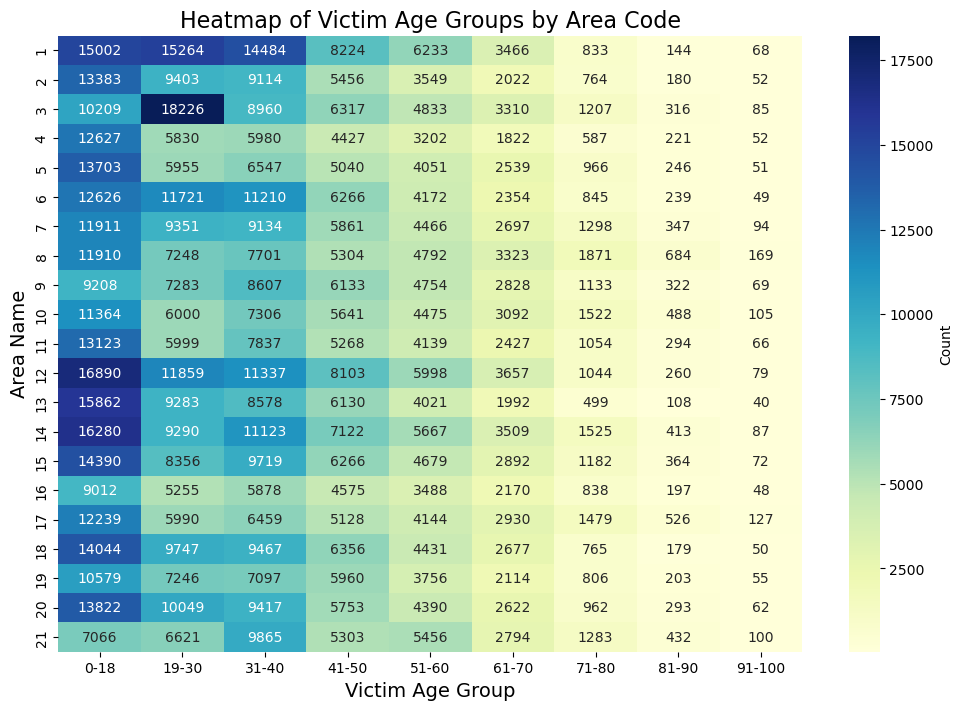

In [19]:
# Optional: Bin the Victim_Age into categories
bins = [0, 18, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df_heatmap['Age_Group'] = pd.cut(df_heatmap['Victim_Age'], bins=bins, labels=labels, right=False)

# Create a pivot table with Area_Code and Age_Group
heatmap_data = df_heatmap.pivot_table(index='Area_Code', columns='Age_Group', values='Area_Name', aggfunc='count', fill_value=0)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Count'})

# Labeling the axes
plt.title('Heatmap of Victim Age Groups by Area Code', fontsize=16)
plt.xlabel('Victim Age Group', fontsize=14)
plt.ylabel('Area Name', fontsize=14)

# Show the plot
plt.show()


### Part 3: Generating Pandas Profiling Reports

#### Generate a Basic Pandas Profiling Report
After creating visualizations, use pandas-profiling to generate a comprehensive exploratory data analysis report:
**Example:**
```
from pandas_profiling
import ProfileReport
# Generate the profiling report
profile = ProfileReport(df, title="Data Profiling Report", explorative=True)
# Display the report in Jupyter Notebook
profile.to_notebook_iframe()
```

#### Deliverable: Submit a screenshot of the pandas profiling report overview.LAST_NAME_6.png

#### Customize the Profiling Report
Explore additional parameters in pandas-profiling by adjusting correlation analysis or turning on/off visualizations for missing values.
**Example**
```
profile = ProfileReport(df, title="Customized Profiling Report", correlations={"pearson": True, "spearman": False}, missing_diagrams={"matrix": True, "bar": False})
# Display the customized report
profile.to_notebook_iframe()
```

#### Deliverable: Submit a screenshot of the customized profiling report.LAST_NAME_7.png